In [251]:
import random
import statistics as st
import matplotlib.pyplot as plt


class Player:

    def __init__(self, num_of_rolls, stop_score):
        self.turns = 7
        self.turn_score = 0
        self.total_score = 0
        self.num_of_rolls = num_of_rolls
        self.stop_score = stop_score
        
    def roll_die(self):
        die = random.randint(1, 6)
        return die

    def add_to_turn_score(self):
        if self.num_of_rolls == 0:
            while self.turn_score < self.stop_score:
                roll_value = self.roll_die()
                if roll_value != 1:
                    self.turn_score += roll_value
                else:
                    self.turn_score = 0
                    break
        else:
            while self.num_of_rolls > 0:
                roll_value = self.roll_die()
                if roll_value != 1:
                    self.turn_score += roll_value
                    self.num_of_rolls -=1
                else: 
                    self.turn_score = 0
                    break
                    
    def end_turn_add_scores(self):
        while self.turns > 0:
            self.add_to_turn_score()
            self.total_score += self.turn_score
            self.turn_score = 0
            self.turns -= 1

        return self.total_score

In [268]:
def trial_n_times(num):
    s_scores = []
    t_scores = []
    r15_scores = []
    r20_scores = []
    r25_scores = []
    for i in range(num):
        standard_player = Player(1, 0)
        s_scores.append(standard_player.end_turn_add_scores())
        
        triple_player = Player(3,0) 
        t_scores.append(triple_player.end_turn_add_scores())
        
        roll_15 = Player(0, 15)
        r15_scores.append(roll_15.end_turn_add_scores())
        
        roll_20 = Player(0, 20)
        r20_scores.append(roll_20.end_turn_add_scores())
        
        roll_25 = Player(0, 25)
        r25_scores.append(roll_25.end_turn_add_scores())
    
    return (s_scores, t_scores, r15_scores, r20_scores, r25_scores)

###Means, Standard Deviation and Max Score for 6 Players

In [269]:
s_scores, t_scores, r15_scores, r20_scores, r25_scores = trial_n_times(1000)

s_mean = st.mean(s_scores)
s_stdev = st.stdev(s_scores)
s_max = max(s_scores)

t_mean = st.mean(t_scores)
t_stdev = st.stdev(t_scores)
t_max = max(t_scores)

r15_mean = st.mean(r15_scores)
r15_stdev = st.stdev(r15_scores)
r15_max = max(r15_scores)

r20_mean = st.mean(r20_scores)
r20_stdev = st.stdev(r20_scores)
r20_max = max(r20_scores)

r25_mean = st.mean(r25_scores)
r25_stdev = st.stdev(r25_scores)
r25_max = max(r25_scores)

In [306]:
stdvs = [s_stdev, t_stdev, r15_stdev, r20_stdev, r20_stdev]
print(stdvs)

[1.3847702295285629, 3.663221832512221, 21.790516690010307, 27.155428339252694, 27.155428339252694]


#Number of rolls and Player Score

In [286]:
%matplotlib inline

###Graph showing Stadard Deviations for each player

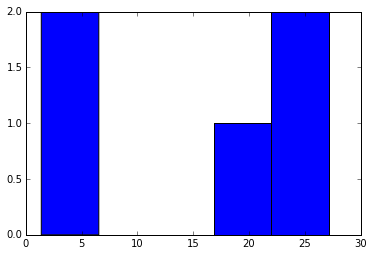

In [305]:
stdvs = [s_stdev, t_stdev, r15_stdev, r20_stdev, r20_stdev]
plt.hist(stdvs, bins=5)
plt.show()

In [ ]:
plt.hist(stdvs, bins=5)
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Ratio of Heads/Tails by Frequency")
ymin, ymax = plt.ylim()
mean = st.mean(trial_results)
stdev = st.stdev(trial_results)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.text(1.7, 4800, "Mean is solid line")
plt.text(1.7, 4000, "StDev 1,2")
plt.text(1.7, 3500, "are dashed lines")
plt.show()

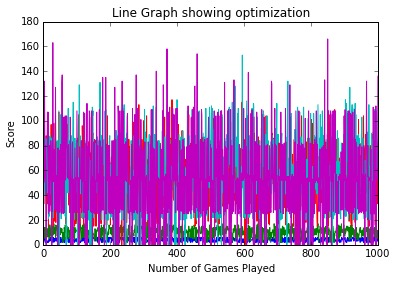

In [303]:
x_list = [i for i in range(1000)]
plt.plot(x_list, s_scores)
plt.plot(x_list, t_scores)
plt.plot(x_list, r15_scores)
plt.plot(x_list, r20_scores)
plt.plot(x_list, r25_scores)
# plt.xticks(range(17), x_title)
plt.xlabel("Number of Games Played")
plt.ylabel("Score")
plt.title("Line Graph showing optimization")
# plt.subplots_adjust(left=2, right=3.5)
plt.show()